# **Arrhythmia Beat Classification**

<small>**By Houssem Khalfi and Chaima Jeljli**</small>

###### **Note: This work is inspired by the one done by Jorge Alarcón and Dante Mújica,[Link](https://github.com/midir99/mitbih_processor/tree/main)**

##  **Introduction**
This project is an implementation of an arrhythmia beat classification system using the publicly available [Physionet MIT-BIH Arrhythmia Database](https://physionet.org/content/mitdb/1.0.0/). The aim of this project is to classify different types of heartbeats from ECG data using machine learning techniques. We build upon the approach outlined in the article [Combining Low-dimensional Wavelet Features and Support Vector Machine for Arrhythmia Beat Classification](https://www.nature.com/articles/s41598-017-06596-z).


## **Dataset: MIT-BIH Arrhythmia Database**

The MIT-BIH arrhythmia database is publicly available dataset which provides standard investigation material for the detection of heart arrhythmia. Since 1980, it is used for purpose of fundamental research and medical device development on cardiac rhythm and related diseases. The objective to build the database is to create an automated arrhythmia detectors that read the diversity of the signal and based on that automated cardiac diagnosis can be done. The different complexities of the electrocardiogram like the variety of the waveform of the heartbeat and corresponding cardiac beat, and the mystifying power of the artifacts and noise, combine to construct study of the signal tricky.

The database consists of 48 two-channel ECG recordings collected from 47 subjects between 1975 and 1979. The recordings were selected to represent both common and rare arrhythmias. Each recording was digitized at 360 samples per second and independently annotated by two cardiologists, leading to over 110,000 annotations. Half of the records have been available since 1999 through PhysioNet, with the remaining files posted in 2005. Here's a table summarizing the data description:

| **Category**                | **Details**                                                                                                                                   |
| --------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------- |
| **Name**                    | MIT-BIH Arrhythmia Database                                                                                                                   |
| **Number of recordings**    | 48 half-hour excerpts                                                                                                                         |
| **Number of subjects**      | 47 subjects                                                                                                                                   |
| **Time of recordings**      | Between 1975 and 1979                                                                                                                         |
| **Source of recordings**    | BIH Arrhythmia Laboratory                                                                                                                     |
| **Subject population**      | 4000 24-hour ECG recordings from inpatients (60%) and outpatients (40%)                                                                       |
| **Selection of recordings** | 23 randomly chosen; 25 selected for less common but clinically significant arrhythmias                                                        |
| **Digitization details**    | - Sample rate: 360 samples per second per channel <br> - Resolution: 11-bit <br> - Range: 10 mV                                               |
| **Annotations**             | Approximately 110,000 annotations <br> Two or more cardiologists independently annotated each record                                          |
| **Disagreement resolution** | Disagreements between cardiologists were resolved for final computer-readable reference annotations                                           |
| **PhysioNet availability**  | - Since September 1999: 25 complete records & reference annotation files <br> - Since February 2005: Remaining 23 signal files also available |

## **Method Description**

1. **Beat Segmentation**: The ECG signal is segmented into beats using QRS intervals based on R-peak locations provided by MITDB.
2. **Wavelet Decomposition**: Features are extracted using wavelet multi-resolution analysis (WMRA).
3. **Principal Component Analysis (PCA)**: PCA is used to reduce the dimensionality of the wavelet features.
4. **Classification**: Three machine learning algorithms are used to classify the heartbeats: K-Nearest Neighbors (KNN), Support Vector Machines (SVM), and Neural Networks.

## **Preprocessing** 

### **Beat segmentation**

In order to extract the same information from the records in the MIT-BIH Arrhythmia Database, we used (**qrsintervals**) that extracts those "QRS Intervals" and saves them in a .mat file.

With the **mitbih_processor.qrsintervals** we extracted the QRS Intervals from the records of the MIT-BIH Arrhythmia Database, the parameters of the extraction function :

- **MIT-BIH Arrhythmia Database path:** the location of the MIT-BIH Database in your file system.
- **Resulting .mat file path:** the file name where the signals will be saved.
- **Annotations:** the annotation labels that you want to extract (A, N, L, etc.).
- **Records to extract:** a list of the MIT-BIH Database records of which the signals will be extracted.
- **ECG lead:** the ECG lead of the signals (MLII, V1, V5, etc).
- **Start sample index:** the entire signals in the MIT-BIH Arrhythmia Database have a length of 650,000 samples, this parameter is the starting sample number to read the signal.
- **End sample index:** the sample number at which to stop reading the signal.
- **QRS Interval length:** this is the length of the QRS Intervals, we used a length of 320 samples in his example.

In this example, we began by reading the signals from the ECG lead MLII, the annotations will be A, V, N, L, and R, and the entire signal so the starting sample will be 0 and the end sample will be 650,000. Then we fixed a QRS interval length of 320 samples, and lastly, we used the datasets proposed by de Chazal, in his paper ***Automatic classification of heartbeats using ECG morphology and heartbeat interval features***.

In [3]:
# Import the modules
import qrsintervals
from datasets import CHAZAL_TEST_DATASET, CHAZAL_TRAIN_DATASET

# Define the extraction parameters
mitdbih_db_path = r'C:\Users\ci\ProjectsDataScience\project\mitbih_processor-main\data\mit-bih-arrhythmia-database-1.0.0'
mat_file = 'ecg_signals.mat'
annotations = 'A', 'V', 'N', 'L', 'R'
records_to_extract = CHAZAL_TEST_DATASET + CHAZAL_TRAIN_DATASET
start_sample_index = 0
end_sample_index = 650_000
qrs_interval_length = 320
ecg_lead = 'MLII'

# Extract the signals and save them to a .mat file
qrsintervals.extract_qrs_intervals_and_save(
    mitdbih_db_path,                       # MIT-BIH Arrhythmia Database path
    mat_file,                              # Resultig .mat file path
    annotations,                           # Annotations
    lead=ecg_lead,                         # ECG lead
    sampfrom=start_sample_index,           # Start sample index
    sampto=end_sample_index,               # End sample index
    dataset=records_to_extract,            # Records to extract
    interval_length=qrs_interval_length    # QRS Interval length
)

Extracting QRS intervals for labels A, V, N, L, R
Extracting QRS intervals from record 100


 - Label A, 33 item(s)
 - Label V, 1 item(s)
Could not cut RR interval from QRS index 76
Could not cut RR interval from QRS index 649992
 - Label N, 2237 item(s)
 - Label L, 0 item(s)
 - Label R, 0 item(s)
Extracting QRS intervals from record 103
 - Label A, 2 item(s)
 - Label V, 0 item(s)
Could not cut RR interval from QRS index 649875
 - Label N, 2081 item(s)
 - Label L, 0 item(s)
 - Label R, 0 item(s)
Extracting QRS intervals from record 105
 - Label A, 0 item(s)
 - Label V, 41 item(s)
 - Label N, 2526 item(s)
 - Label L, 0 item(s)
 - Label R, 0 item(s)
Extracting QRS intervals from record 111
 - Label A, 0 item(s)
 - Label V, 1 item(s)
 - Label N, 0 item(s)
 - Label L, 2123 item(s)
 - Label R, 0 item(s)
Extracting QRS intervals from record 113
 - Label A, 0 item(s)
 - Label V, 0 item(s)
Could not cut RR interval from QRS index 649994
 - Label N, 1788 item(s)
 - Label L, 0 item(s)
 - Label R, 0 item(s)
Extracting QRS intervals from record 117
 - Label A, 1 item(s)
 - Label V, 0 item

Above a report of the signals extracted. These signals were stored in a .mat file, this file contains the variables A, V, N, L, and R, because of the annotations specified for the extraction. The signals are stored in a matrix, but in this case, they are rows, not columns. the following plot is the extracted signals.


In [4]:
# Import the required libraries
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Load the ecg_signals.mat file
ECG_signals = sio.loadmat('ecg_signals.mat')
N_signals = ECG_signals['N']
A_signals = ECG_signals['A']
V_signals = ECG_signals['V']
L_signals = ECG_signals['L']
R_signals = ECG_signals['R']

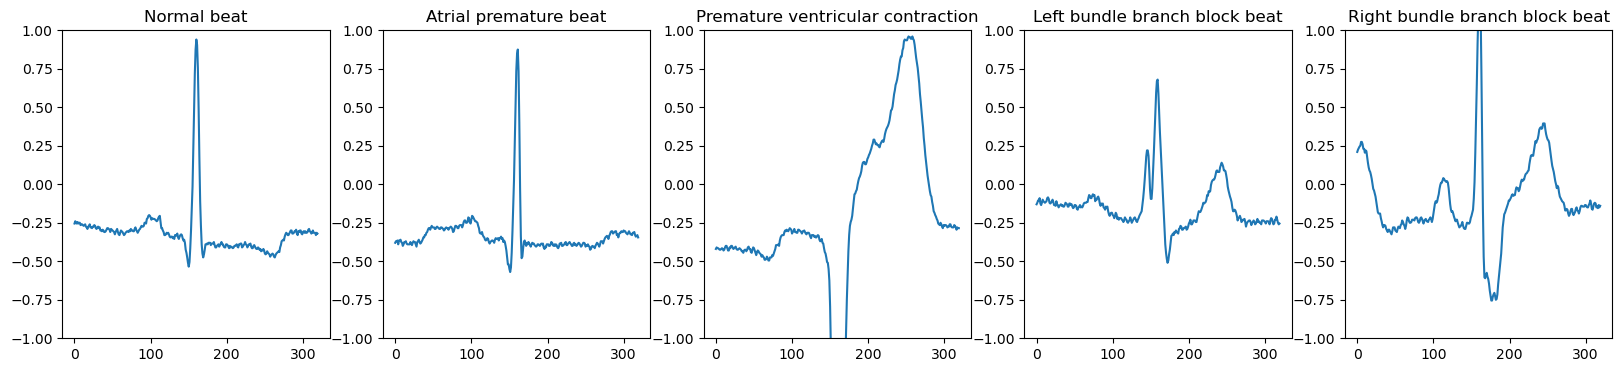

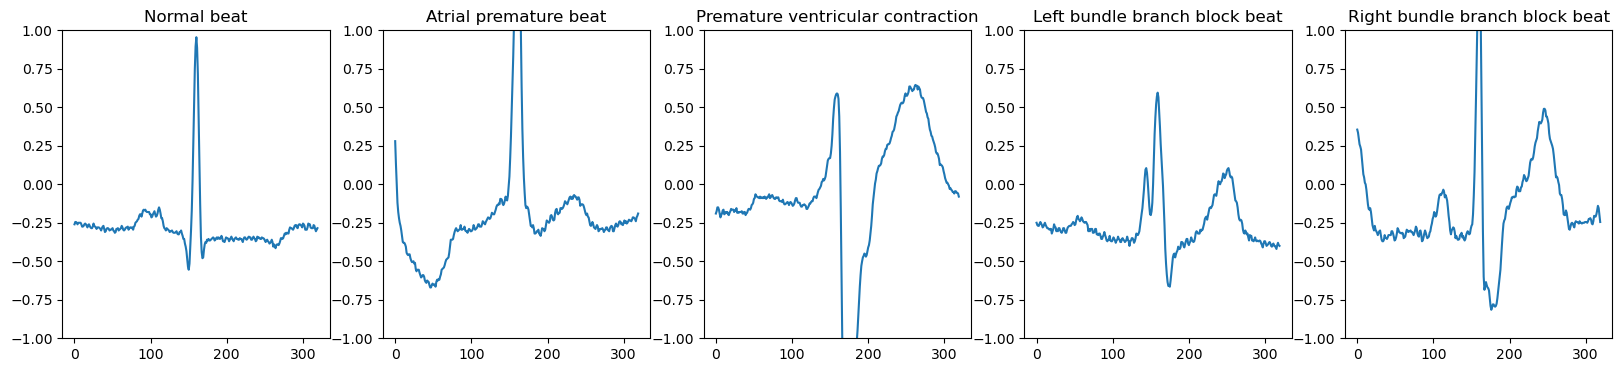

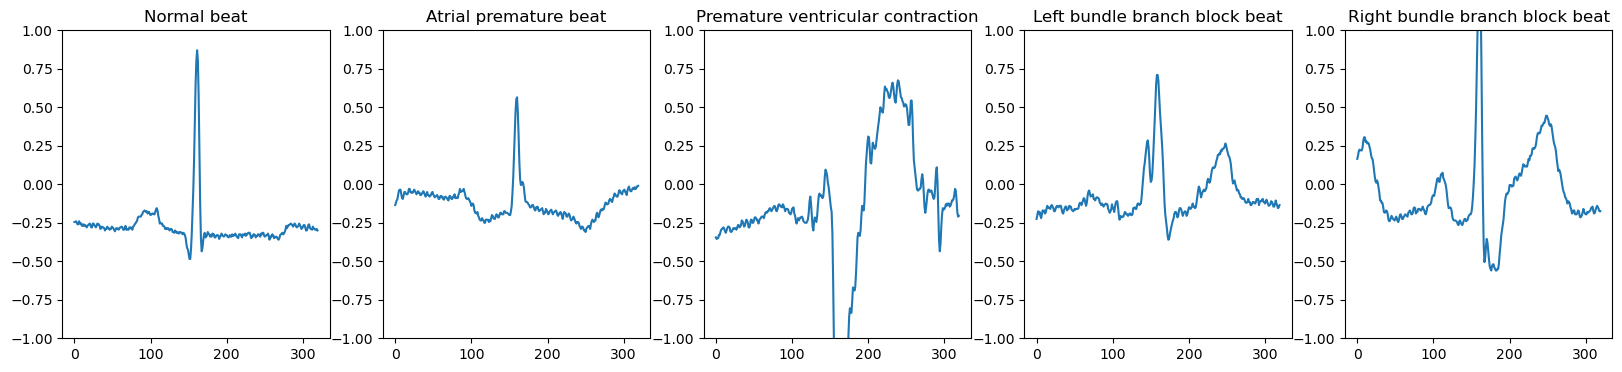

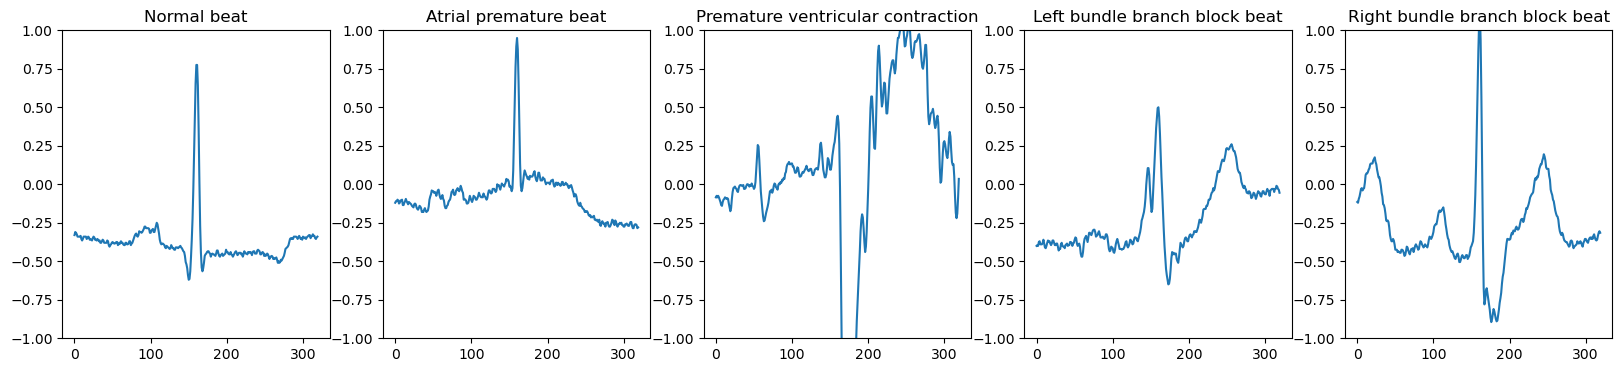

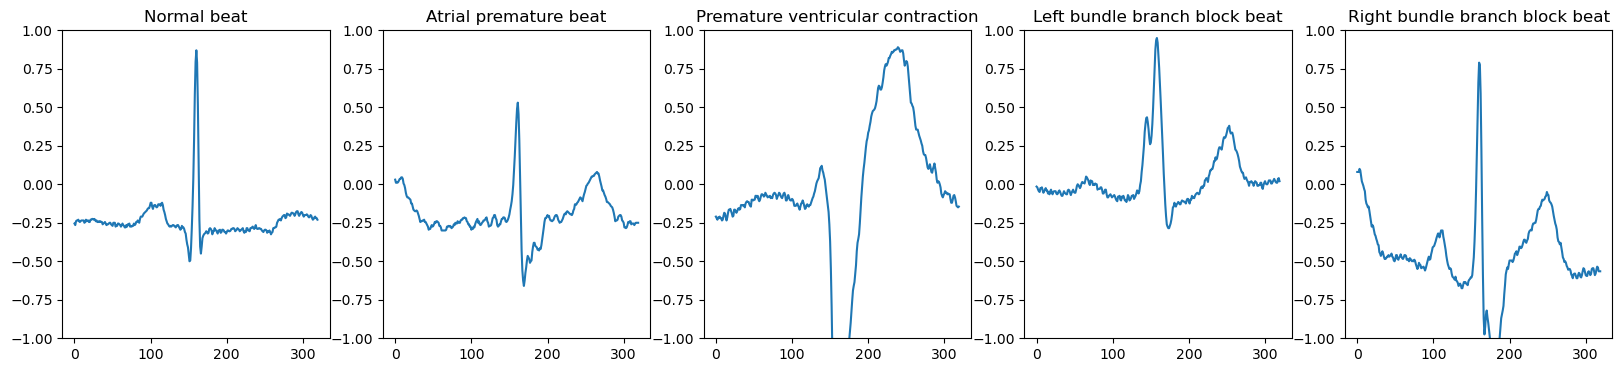

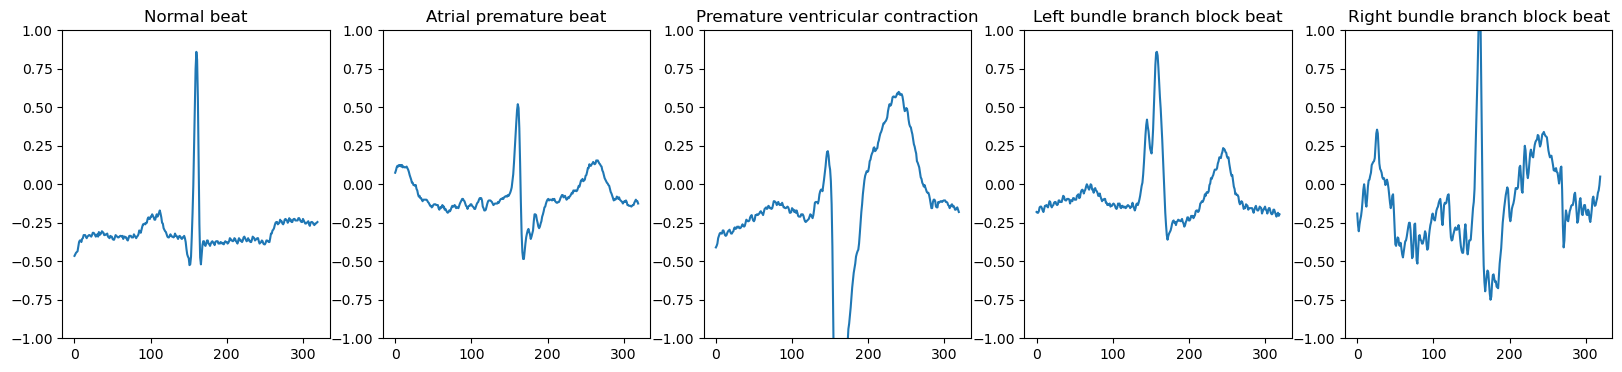

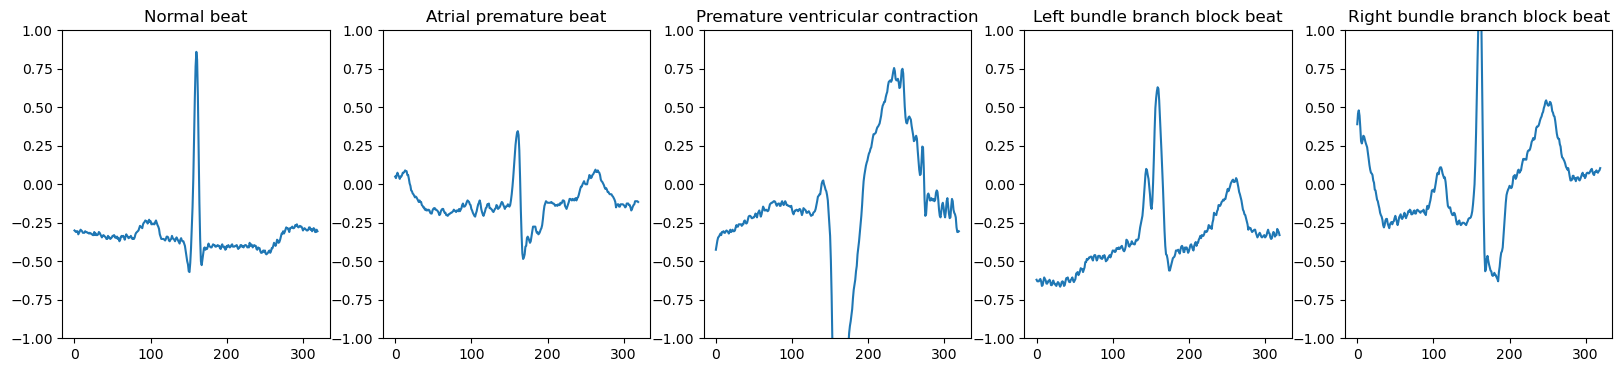

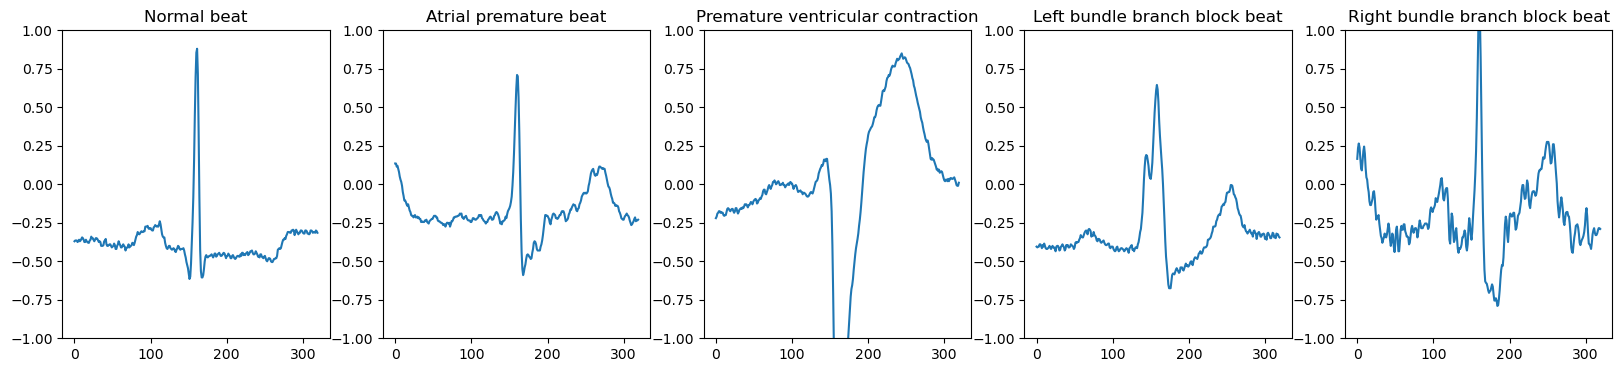

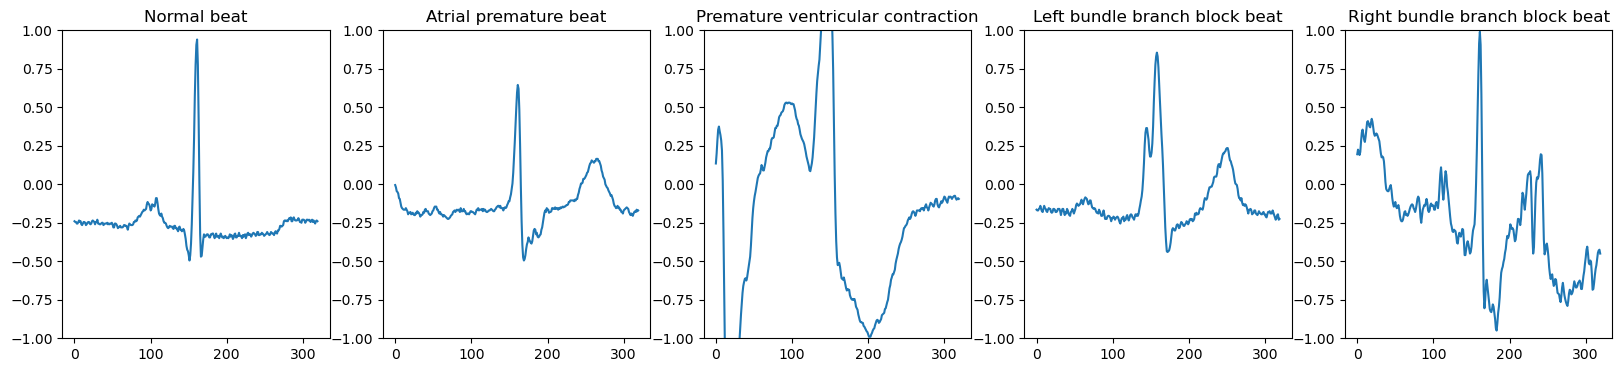

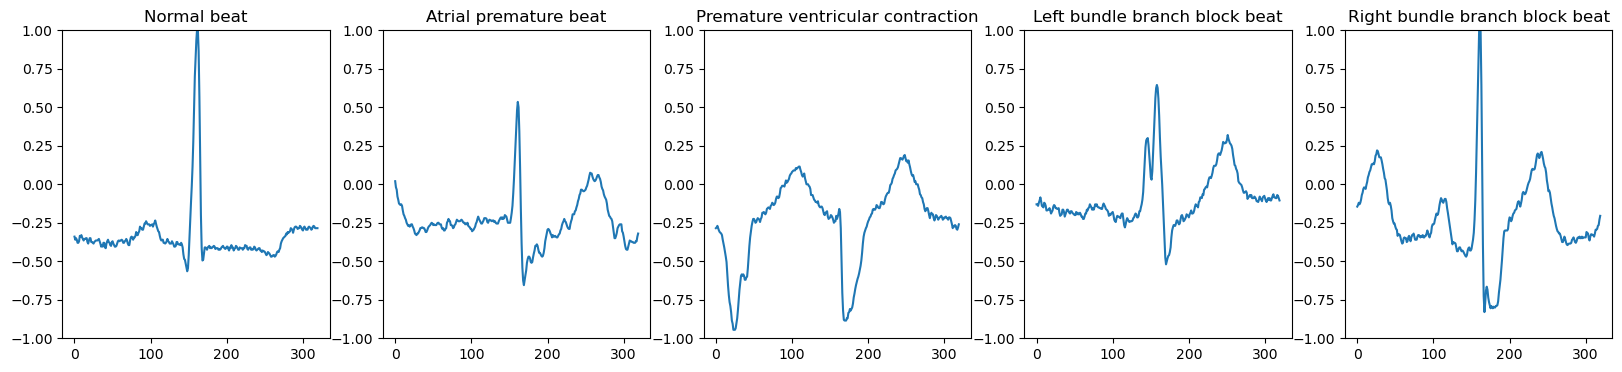

In [6]:
# Plot the signals
x = range(0, 320)
for i in range(0, 1000, 100):
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))    
    ax1.set_title('Normal beat')
    ax1.plot(x, N_signals[i, :])
    ax1.set_ylim([-1, 1])
    ax2.set_title('Atrial premature beat')
    ax2.plot(x, A_signals[i, :])
    ax2.set_ylim([-1, 1])    
    ax3.set_title('Premature ventricular contraction')
    ax3.plot(x, V_signals[i, :])
    ax3.set_ylim([-1, 1])    
    ax4.set_title('Left bundle branch block beat')
    ax4.plot(x, L_signals[i, :])
    ax4.set_ylim([-1, 1])
    ax5.set_title('Right bundle branch block beat')
    ax5.plot(x, R_signals[i, :])
    ax5.set_ylim([-1, 1])    
    plt.show()

### **Feature Extraction**
After extracting the signals from the MIT-BIH Database, the next step is to decompose the signals using Wavelets to extract the following features:
- Mean values of each sub-band
- The standard deviation of each sub-band
- Median values of each sub-band
- The skewness of each sub-band
- Kurtosis of each sub-band
- Root mean square of each sub-band
- The ratio of each sub-band

In order to do this, we used the function **preprocessing.extract_features**, but before this, we define the feature extraction parameters:

- **ECG signals:** the ECG signals loaded from the ecg_signals.mat file.
- **Classification classes:** a list with the classes of the ECG signals (A, V, N, etc.).
- **Signals per class:** how many signals per class for classification exist.
- **Wavelet name:** the wavelet name.
- **Decomposition level:** the decomposition level for the Wavelet decomposition.

We used "bior" wavelet family and specifically the "bior 6.8". The The maximum decomposition level can be calculated with the library PyWavelets, an adequate decomposition level is one that does not generate infinite values of division by zero errors when Wavelet decomposition is being applied and we chose 8 levels for the decomposition.

In [7]:
# Import the required libraries
import pandas as pd
import pywt
import preprocessing

In [8]:
# Load the ecg_signals.mat file
ECG_signals = sio.loadmat('ecg_signals.mat')

In [9]:
# Define the feature extraction parameters
classes = 'A', 'V', 'N', 'L', 'R'
signals_per_class = 2546
wavelet = pywt.Wavelet('bior6.8')
# By the next way, you can calculate the maximum decomposition level
# but this time we will use 8 instead.
#decomposition_level = pywt.dwt_max_level(
#    data_len=320,  # Each signal has 320 samples
#    filter_len=wavelet_bior6.8.dec_len
#)
decomposition_level = 8

In [10]:
# Extract features
ext_feat_signals = preprocessing.extract_features(
    ECG_signals,         # The ECG signals from the ecg_signals.mat
    classes,             # The classification classes (A, V, N, L, R)
    signals_per_class,   # How many signals per class we have
    wavelet,         # The Wavelet
    decomposition_level  # The decomposition level for the Wavelet decomposition
)

In [11]:
ext_feat_signals

,mean_a,mean_aa,mean_aaa,mean_aaaa,mean_aaaaa,mean_aaaaaa,mean_aaaaaaa,mean_aaaaaaaa,mean_d,mean_dd,...,ratio_aaaaaaa/aaaaaaaa,ratio_aaaaaaaa/d,ratio_d/dd,ratio_dd/ddd,ratio_ddd/dddd,ratio_dddd/ddddd,ratio_ddddd/dddddd,ratio_dddddd/ddddddd,ratio_ddddddd/dddddddd,classes
0,0.500163,0.701112,1.007786,1.349372,1.929563,2.761470,3.939690,5.598825,0.004704,0.004746,...,0.703664,1190.345689,0.991061,1.208426,0.805181,0.784433,0.809649,0.763986,0.733624,0
1,0.519153,0.731441,1.046005,1.399573,2.012063,2.892252,4.137532,5.888860,0.004482,0.004470,...,0.702603,1313.750706,1.002809,0.948724,1.065363,1.086516,0.871757,0.765860,0.773555,0
2,0.516556,0.727795,1.043902,1.403093,2.016775,2.898810,4.145947,5.900487,0.004469,0.004579,...,0.702645,1320.350476,0.976047,1.223913,1.091404,0.991500,0.860750,0.725568,0.793059,0
3,0.517826,0.729160,1.045899,1.409149,2.030476,2.913965,4.176266,5.950597,0.004374,0.004741,...,0.701823,1360.377589,0.922604,0.968306,0.866549,0.797069,0.793485,0.707953,0.749956,0
4,0.502903,0.711194,1.009828,1.356043,1.938246,2.796186,4.028767,5.757713,0.005113,0.005930,...,0.699717,1126.089174,0.862214,1.263918,1.192800,0.946828,0.855553,1.341108,0.819147,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12725,0.390598,0.536993,0.748392,0.918621,1.222916,1.700391,2.333826,3.262141,0.004283,0.004268,...,0.715428,761.561513,1.003558,0.986179,0.927614,0.857020,0.849204,0.824820,0.730659,4
12726,0.411293,0.571224,0.788358,0.992802,1.325734,1.844080,2.492637,3.491570,0.004213,0.004445,...,0.713902,828.698208,0.947786,1.015823,1.026113,0.732528,0.823294,0.749189,0.856935,4
12727,0.376315,0.508098,0.697184,0.817034,1.052968,1.394874,1.807284,2.479741,0.004155,0.003909,...,0.728820,596.867634,1.062937,1.152529,0.943119,0.961417,0.759079,0.734478,0.840791,4
12728,0.361900,0.498314,0.686000,0.837274,1.107163,1.533969,2.035067,2.846614,0.004084,0.004131,...,0.714908,697.005020,0.988587,1.054524,0.944504,0.966366,0.791647,0.784601,0.717730,4


In [12]:
# save the DataFrame, in order to use it later
ext_feat_signals.to_csv('ecg_signals.preprocessed.csv', index=False)

The data of features extracted are stored in a pandas DataFrame, each column has a meaningful name about what extracted features it contains. Wavelet decomposition results in nodes, A for approximation coefficients and D for detailed coefficients, this information is processed obtaining the mean, the standard deviation, the median, the skewness, the kurtosis, the root mean square, and the ratio of each sub-band, and then this information is saved in the columns of the DataFrame.

In [13]:
for col in ext_feat_signals.columns:    
    print(f'- {col}')

- mean_a
- mean_aa
- mean_aaa
- mean_aaaa
- mean_aaaaa
- mean_aaaaaa
- mean_aaaaaaa
- mean_aaaaaaaa
- mean_d
- mean_dd
- mean_ddd
- mean_dddd
- mean_ddddd
- mean_dddddd
- mean_ddddddd
- mean_dddddddd
- std_dev_a
- std_dev_aa
- std_dev_aaa
- std_dev_aaaa
- std_dev_aaaaa
- std_dev_aaaaaa
- std_dev_aaaaaaa
- std_dev_aaaaaaaa
- std_dev_d
- std_dev_dd
- std_dev_ddd
- std_dev_dddd
- std_dev_ddddd
- std_dev_dddddd
- std_dev_ddddddd
- std_dev_dddddddd
- median_a
- median_aa
- median_aaa
- median_aaaa
- median_aaaaa
- median_aaaaaa
- median_aaaaaaa
- median_aaaaaaaa
- median_d
- median_dd
- median_ddd
- median_dddd
- median_ddddd
- median_dddddd
- median_ddddddd
- median_dddddddd
- skewness_a
- skewness_aa
- skewness_aaa
- skewness_aaaa
- skewness_aaaaa
- skewness_aaaaaa
- skewness_aaaaaaa
- skewness_aaaaaaaa
- skewness_d
- skewness_dd
- skewness_ddd
- skewness_dddd
- skewness_ddddd
- skewness_dddddd
- skewness_ddddddd
- skewness_dddddddd
- kurtosis_a
- kurtosis_aa
- kurtosis_aaa
- kurtosis_aaa

The column "classes" in the DataFrame indicates what is the signal class of that row, as we provided the parameter classes as A, V, B, L, R, the 0 means A, 1 means V, and so then.
    
As we specified 2546 signals per class and A, V, N, L, and R for the classification classes, the rows from 0 to 2545 store extracted features for the A signals, the rows from 2546 to 5091 store extracted features for the V signals, the rows from 5092 to 7637 store extracted features for the N signals, the rows from 7638 to 10183 store extracted features for the L signals and the rows from 10184 to 12729 store extracted features for the R signals.

## **Classification**

The last step is to select a classification model, train it, and test it. In this case, we used different classifiers and then make a comparison and a selection of the most important features were applied using PCA.

In [14]:
# Import the required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
# Import the classifiers
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

### **Data Loading**

In [15]:
# Read the DataFrame
ext_feat_signals = pd.read_csv('ecg_signals.preprocessed.csv')
X = ext_feat_signals[ext_feat_signals.columns.difference(['classes'])]
y = ext_feat_signals['classes']
classes = 'A', 'V', 'N', 'L', 'R'
# Split data in 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [16]:
df1 = pd.DataFrame(X)
df1.head()

,kurtosis_a,kurtosis_aa,kurtosis_aaa,kurtosis_aaaa,kurtosis_aaaaa,kurtosis_aaaaaa,kurtosis_aaaaaaa,kurtosis_aaaaaaaa,kurtosis_d,kurtosis_dd,...,std_dev_aaaaaaa,std_dev_aaaaaaaa,std_dev_d,std_dev_dd,std_dev_ddd,std_dev_dddd,std_dev_ddddd,std_dev_dddddd,std_dev_ddddddd,std_dev_dddddddd
0,35.176024,46.070453,37.420128,3.878440,4.324754,-0.061314,-0.342152,-1.802419,0.486486,0.356146,...,0.302661,0.347864,0.005833,0.006092,0.005009,0.006258,0.008462,0.011080,0.015121,0.020637
1,42.149790,44.502392,43.678323,7.466996,7.929241,-0.820877,-1.193688,-1.857670,3.324064,7.259253,...,0.444745,0.568936,0.005974,0.006538,0.006593,0.005994,0.004736,0.005683,0.007446,0.009742
2,34.444120,40.909447,32.924734,3.275016,2.624250,-0.198410,-0.795553,-1.841260,1.544489,4.587402,...,0.424277,0.523037,0.006084,0.006489,0.005251,0.004418,0.004413,0.005454,0.007333,0.009713
3,32.956474,38.897903,36.881603,4.976759,6.182415,5.836341,8.851350,3.251211,1.125635,1.018767,...,0.275739,0.209340,0.005666,0.005941,0.006328,0.007071,0.009075,0.012694,0.017519,0.023808
4,26.069836,29.995565,35.908702,6.744960,7.539968,9.084867,8.664355,1.159239,12.301707,16.180180,...,0.392041,0.297423,0.007433,0.008836,0.005727,0.005199,0.005474,0.005990,0.005197,0.005465


### **Standard scalar normalization**

In [17]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_normalized = sc.fit_transform(X_train)
X_test_normalized = sc.transform(X_test)

### **PCA**

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95) #set explained variance to be 95%
X_train_pca = pca.fit_transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)

In [19]:
df_pca = pd.DataFrame(X_train_pca)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,6.771157,-6.103232,6.003726,-0.392555,0.388110,-3.433174,1.130707,1.161400,2.595274,-0.799795,...,0.129913,0.348852,0.026814,-0.312447,-0.056617,-0.152828,0.478054,-0.559539,-0.110532,-0.138633
1,1.310204,-0.480627,4.840366,-0.748275,-2.134875,3.842604,2.473444,0.000789,-1.271913,0.661749,...,-0.494842,-0.689343,1.909759,1.375644,-0.214915,-0.127000,-0.108173,0.014150,0.242310,0.506514
2,-4.338819,3.442039,3.128883,0.360355,-0.898227,-0.570301,3.431546,0.102338,-2.266439,2.360078,...,-0.050556,-0.334319,0.365229,0.287896,0.761064,-0.877114,-0.936141,-0.437980,-0.531634,-0.885031
3,2.480374,4.732947,-6.723374,3.312054,-0.111244,2.137275,-2.097079,0.135762,0.430949,-0.362998,...,0.359897,1.172473,0.103822,0.230190,-0.298018,0.100549,-0.096029,-0.710334,0.095611,-0.077160
4,-1.024687,4.817223,2.283270,-0.065351,-0.663889,1.218690,0.824613,-0.016527,-1.656940,0.889011,...,0.457917,-0.122809,0.326997,-0.854719,-0.148411,0.229469,0.521610,-0.227103,-0.076288,-0.711621


### **Classifiers and Results**

For this work we used 3 type of classifier :
- K-Nearest Neighbors
- SVM
- Neural Net

The metrics used to evalute the model are :
- Accuracy
- Precision
- Recall
- F1 Score 

In [20]:
class Classifier:
    def __init__(self, name=None, clf=None, accuracy=None, precision=None, recall=None, f1=None):
        self.name = name
        self.clf = clf
        self.accuracy = accuracy
        self.precision = precision
        self.recall = recall
        self.f1 = f1

classifiers = [
    Classifier("Nearest Neighbors", KNeighborsClassifier(3)),
    Classifier("Linear SVM", SVC(kernel="linear", C=0.025)),
    Classifier("RBF SVM", SVC(gamma=0.1, C=10)),
    Classifier("Neural Net", MLPClassifier(alpha=1, max_iter=1000)),
]

c:\Users\ci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Classification Report For Nearest Neighbors

              precision    recall  f1-score   support

           A       0.79      0.84      0.82       742
           V       0.83      0.93      0.88       697
           N       0.99      0.95      0.97       748
           L       0.90      0.85      0.87       765
           R       0.94      0.87      0.90       867

    accuracy                           0.89      3819
   macro avg       0.89      0.89      0.89      3819
weighted avg       0.89      0.89      0.89      3819



c:\Users\ci\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\ci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


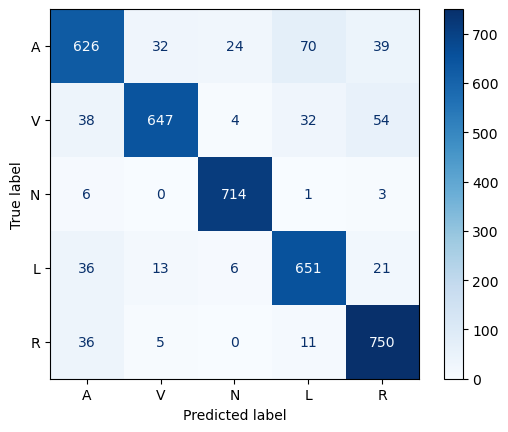

Classification Report For Linear SVM

              precision    recall  f1-score   support

           A       0.85      0.88      0.86       759
           V       0.89      0.91      0.90       760
           N       1.00      0.96      0.98       754
           L       0.90      0.92      0.91       713
           R       0.99      0.95      0.97       833

    accuracy                           0.92      3819
   macro avg       0.92      0.92      0.92      3819
weighted avg       0.93      0.92      0.92      3819



c:\Users\ci\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


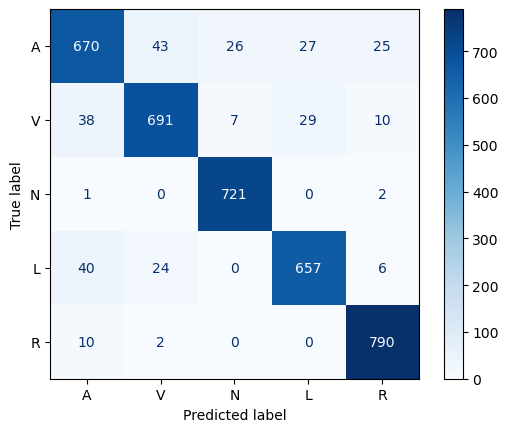

Classification Report For RBF SVM

              precision    recall  f1-score   support

           A       0.69      0.96      0.80       572
           V       0.94      0.60      0.73      1211
           N       0.89      0.98      0.93       657
           L       0.81      0.92      0.86       643
           R       0.85      0.92      0.88       736

    accuracy                           0.84      3819
   macro avg       0.84      0.88      0.84      3819
weighted avg       0.85      0.84      0.83      3819



c:\Users\ci\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


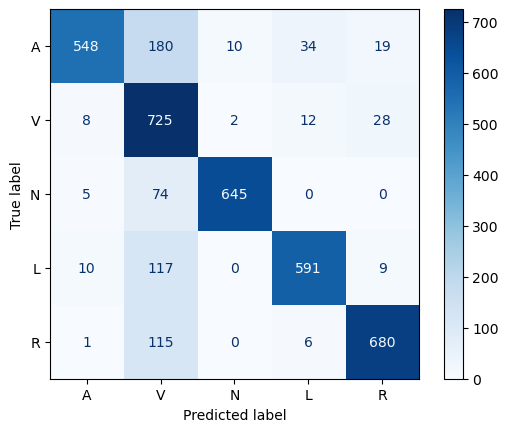

Classification Report For Neural Net

              precision    recall  f1-score   support

           A       0.90      0.95      0.92       749
           V       0.93      0.94      0.93       772
           N       0.99      0.97      0.98       743
           L       0.96      0.96      0.96       723
           R       1.00      0.96      0.98       832

    accuracy                           0.95      3819
   macro avg       0.96      0.96      0.96      3819
weighted avg       0.96      0.95      0.96      3819



c:\Users\ci\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


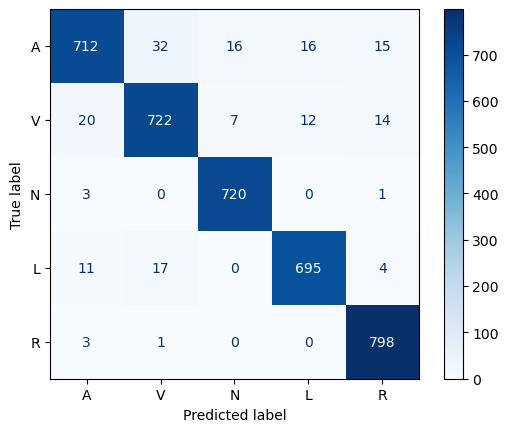

In [21]:
# Iterate over classifiers and show thier results
for clf_object in classifiers:
    # Train the model
    clf_object.clf.fit(X_train_pca, y_train)
    # Predict
    y_pred = clf_object.clf.predict(X_test_pca)
    # Calculate classification metrics
    clf_object.accuracy = np.round(metrics.accuracy_score(y_test, y_pred), 4)
    clf_object.precision = np.round(metrics.precision_score(y_test, y_pred, average='weighted'), 4)
    clf_object.recall = np.round(metrics.recall_score(y_test, y_pred, average='weighted'), 4)
    clf_object.f1 = np.round(metrics.f1_score(y_test, y_pred, average='weighted'), 4)
    # Print the classification report and plot the confusion matrix
    print(f'Classification Report For {clf_object.name}\n')
    print(metrics.classification_report(y_pred, y_test, target_names=classes))
    metrics.plot_confusion_matrix(clf_object.clf, X_test_pca, y_test, display_labels=classes, cmap=plt.cm.Blues)
    plt.show()

In [22]:
from IPython.display import HTML, display

rows = ""
for clf_object in classifiers:
    rows += f"""
    <tr>
        <td><b>{clf_object.name}</b></td>
        <td>{clf_object.accuracy}</td>
        <td>{clf_object.precision}</td>
        <td>{clf_object.recall}</td>
        <td>{clf_object.f1}</td>
    </tr>
    """

html = HTML(f"""
<table>
<thead>
    <th>Algorithm</th>
    <th>Accuracy</th>
    <th>Precision</th>
    <th>Recall</th>
    <th>F1 Score</th>
</thead>
<tbody>
{rows}
</tbody>
</table>
""")
display(html)

Nearest Neighbors,0.8871,0.8877,0.8871,0.8863
Linear SVM,0.9241,0.9232,0.9241,0.9234
RBF SVM,0.835,0.875,0.835,0.8417
Neural Net,0.955,0.9548,0.955,0.9546


#### **Results**
The results obtained show that the best classification algorithms are the linear SVM, the neural network.